# Flower detection

#### a pattern recognition system project

Our goal in this project is to build a convolutional neural network that can recognize flowers based on images.

In [1]:
# Initial setup
import random

seed = 42

random.seed(seed)


In [2]:
#imports

import os
from pathlib import Path
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
dataset_path = os.path.abspath('./datasets/flowers_train')
train_dir = Path(dataset_path)
print(train_dir)

e:\info\IV-1\PD\flowers\datasets\flowers_train


e:\info\IV-1\PD\flowers\datasets\flowers_train\dandelion\10043234166_e6dd915111_n.jpg


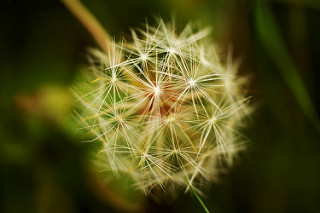

In [4]:
dandelion = list((train_dir/ 'dandelion').glob('*'))
print(dandelion[0])
PIL.Image.open(str(dandelion[0]))

We can print our classes

In [5]:
class_dirs = list((train_dir).glob('*'))
class_names= [cls.name for cls in class_dirs]
print(class_dirs)
print(class_names)

[WindowsPath('e:/info/IV-1/PD/flowers/datasets/flowers_train/daisy'), WindowsPath('e:/info/IV-1/PD/flowers/datasets/flowers_train/dandelion'), WindowsPath('e:/info/IV-1/PD/flowers/datasets/flowers_train/rose'), WindowsPath('e:/info/IV-1/PD/flowers/datasets/flowers_train/sunflower'), WindowsPath('e:/info/IV-1/PD/flowers/datasets/flowers_train/tulip')]
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


We create our training and validation sets. It is important to note that we also keep a separate test folder. This split has been made to avoid leakage and the ratio is 90:10 in favor of training data. We then split our training data so that we also have validation data to play with.

In [6]:
img_height, img_width = 180, 180
batch_size = 32

(train_ds, validation_ds) = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode = 'categorical',
    validation_split=0.2,
    subset='both',
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 3887 files belonging to 5 classes.
Using 3110 files for training.
Using 777 files for validation.


### First, we will use a pre-trained model

Thism gives us a multitude of benefits, such as:
- by using imagenet weights, we should get better results

In [7]:
resnet_model = Sequential()

pretrained_model = keras.applications.ResNet50(include_top=False, input_shape=(180,180,3), pooling='avg',
                                                classes=5, weights='imagenet')

In [8]:
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)

In [9]:
resnet_model.add(Flatten())
resnet_model.add(Dense(256, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 2048)           │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,113,541 (91.99 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [10]:
resnet_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics= ['accuracy'])

In [11]:
#resnet1 = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=10)

#### But what if we want to build our Neural network from scratch?

Steps that improved it
- adding multiple conv+maxpool layers
- adding the dropout layer
- adding an extra dense layer

In [26]:
my_seq_model = tf.keras.Sequential([tf.keras.layers.Input(shape=(180,180,3)),
                                    tf.keras.layers.Conv2D(1,(3,3)),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    tf.keras.layers.Conv2D(1,(3,3)),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    tf.keras.layers.Conv2D(1,(3,3)),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    tf.keras.layers.Conv2D(1,(3,3)),
                                    tf.keras.layers.MaxPool2D((2,2)),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation="relu"),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(64, activation="relu"),
                                    tf.keras.layers.Dense(5, activation="softmax")])

my_seq_model

<Sequential name=sequential_4, built=True>

In [27]:
my_seq_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics= ['accuracy'])

In [28]:
my_seq = my_seq_model.fit(train_ds, validation_data=validation_ds, epochs=10)

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - accuracy: 0.2269 - loss: 27.2137 - val_accuracy: 0.2883 - val_loss: 2.7611
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.2583 - loss: 2.9253 - val_accuracy: 0.2793 - val_loss: 1.8332
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.2756 - loss: 1.9616 - val_accuracy: 0.3024 - val_loss: 1.6642
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.2940 - loss: 1.6729 - val_accuracy: 0.3269 - val_loss: 1.5872
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.3136 - loss: 1.5994 - val_accuracy: 0.3501 - val_loss: 1.5457
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.3256 - loss: 1.5445 - val_accuracy: 0.3488 - val_loss: 1.5108
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.3512 - loss: 1.5067 - val_accuracy: 0.3591 - val_loss: 1.4836
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.3632 - loss: 1.4820 - val_accuracy: 0.3822 - 

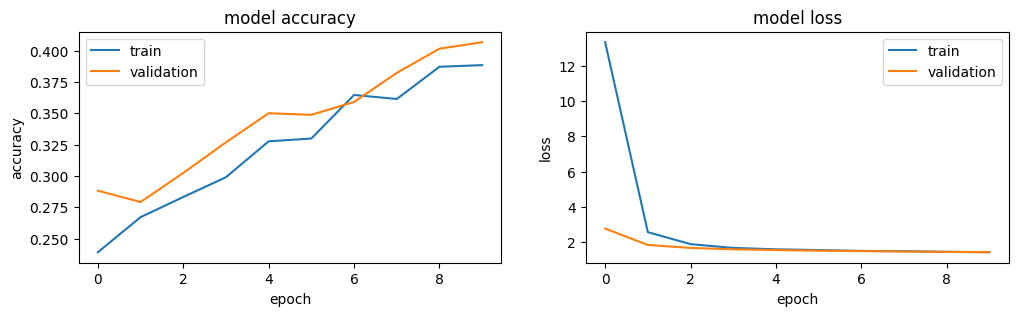

In [29]:
plt.figure(1, figsize = (12,3))

plt.subplot(121)
plt.plot(my_seq.history['accuracy'])
plt.plot(my_seq.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.subplot(122)
plt.plot(my_seq.history['loss'])
plt.plot(my_seq.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

plt.show()

In [30]:
#plt.figure(1, figsize = (12,3))

#plt.subplot(121)
#plt.plot(resnet1.history['accuracy'])
#plt.plot(resnet1.history['val_accuracy'])
#plt.title('model accuracy')
#plt.ylabel('accuracy')
#plt.xlabel('epoch')
#plt.legend(['train', 'validation'])

#plt.subplot(122)
#plt.plot(resnet1.history['loss'])
#plt.plot(resnet1.history['val_loss'])
#plt.title('model loss')
#plt.ylabel('loss')
#plt.xlabel('epoch')
#plt.legend(['train', 'validation'])

#plt.show()


# TODO:

- more epochs
- bigger nn
- google colab?
- train, val, test split